### Importing Modules

In [1]:
# .py file with all lyrics functions
import lyrics_functions

# Third-party modules
import pickle
import re
import pandas as pd
import string
import time
import numpy as np
from collections import Counter

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

from statistics import mean

import os

### Load in Data

In [2]:
# Data Filenames
song_fname = 'Songs'
lyric_fname = 'Lyrics_Dict'

# Load in song lists
loadtime= time.time()
with open(song_fname,'rb') as f:
    songs = pickle.load(f)

# Load in lyrics
with open(lyric_fname, 'rb') as f:
    lyric_dict = pickle.load(f)
print('dataload',time.time()-loadtime)

dataload 0.8906145095825195


### Bin the Data

In [3]:
# Get binned versions (year and decade in this case)
start = time.time()
binned_year = lyrics_functions.to_timeframe(songs, lyric_dict, timeframe='year')

start = time.time()
binned_decade = lyrics_functions.to_timeframe(songs, lyric_dict, timeframe='decade')

### Find and Plot Some Statistics

In [4]:
# Average length of unique words per year
avg_unique = lyrics_functions.avg_wrd_len(binned=binned_year)
avg_unique

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Avg_Word_Len,6.342479,5.81183,5.882061,6.09235,6.178183,5.900249,6.095596,6.514724,6.072508,6.31286,...,6.298186,6.289247,6.169683,6.247441,6.155571,6.230197,6.212205,6.179479,6.267194,5.848019


In [5]:
# Average length including duplicates
avg = lyrics_functions.avg_wrd_len(binned=binned_year,unique=False)
avg

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Avg_Word_Len,4.080276,3.775712,3.822467,3.803978,3.84182,3.759484,3.7419,3.758485,3.793708,3.817385,...,3.788849,3.763483,3.771508,3.768715,3.759593,3.752711,3.751226,3.760654,3.749763,3.742202


In [6]:
# Variance of unique word length
var_unique = lyrics_functions.variance_words(binned=binned_year)
var_unique

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Variance_word_length,5.409464,4.181742,4.675517,4.840688,5.394886,4.650322,4.991203,5.742655,5.301148,5.485127,...,5.423819,5.38834,5.517361,6.017344,5.728931,5.442177,5.276891,5.048962,5.552568,4.841484


In [7]:
# Variance including duplicates
var = lyrics_functions.variance_words(binned=binned_year,unique=False)
var

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Variance_word_length,4.116938,3.049893,3.15001,3.152129,3.355256,3.017673,2.956074,3.064895,3.124643,3.345097,...,3.375886,3.306284,3.22176,3.230495,3.116765,3.105536,3.080059,3.200473,3.225938,3.196611


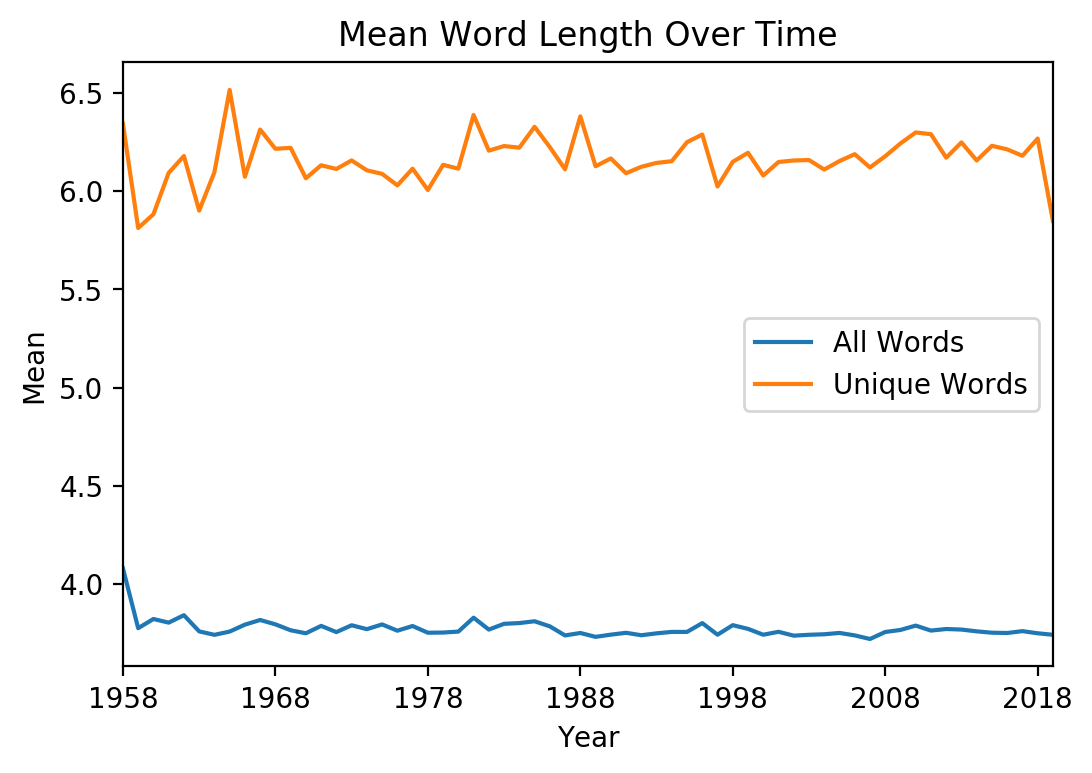

In [8]:
# Make line plots of average word length
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

ax = avg.T.plot()
avg_unique.T.plot(ax = ax)

ax.legend(('All Words', 'Unique Words'), loc = 'best')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean Word Length Over Time')

plt.savefig('Figs/Average.png')

plt.show()

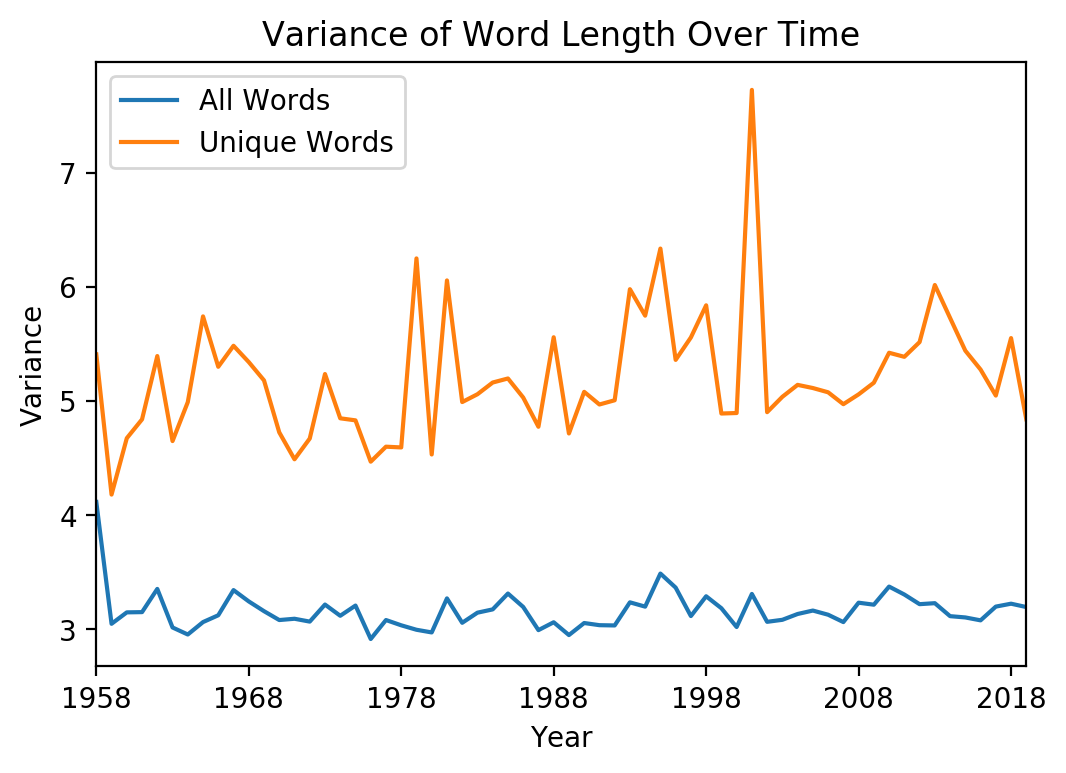

In [9]:
# Make line plots of the variance of word length
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

ax = var.T.plot()
var_unique.T.plot(ax = ax)

ax.legend(('All Words', 'Unique Words'), loc = 'best')
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('Variance of Word Length Over Time')

plt.savefig('Figs/Var.png')

plt.show()

In [10]:
# Find average # of unique words per song
unique = pd.DataFrame(columns = binned_year.keys())

# Take the mean
means = []
for tf in unique.columns:
    means.append(mean(binned_year[str(tf)]['unique_words']))
    
unique.loc['Avg_Unique_Words'] = means

In [11]:
# Structure of this DataFrame
unique

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Avg_Unique_Words,92.688312,67.587708,66.76886,68.196511,74.856739,72.005805,71.732928,74.024531,76.371501,79.451809,...,140.545528,139.985567,129.463911,132.461799,125.524344,130.429425,128.809133,138.46875,145.430778,136.58306


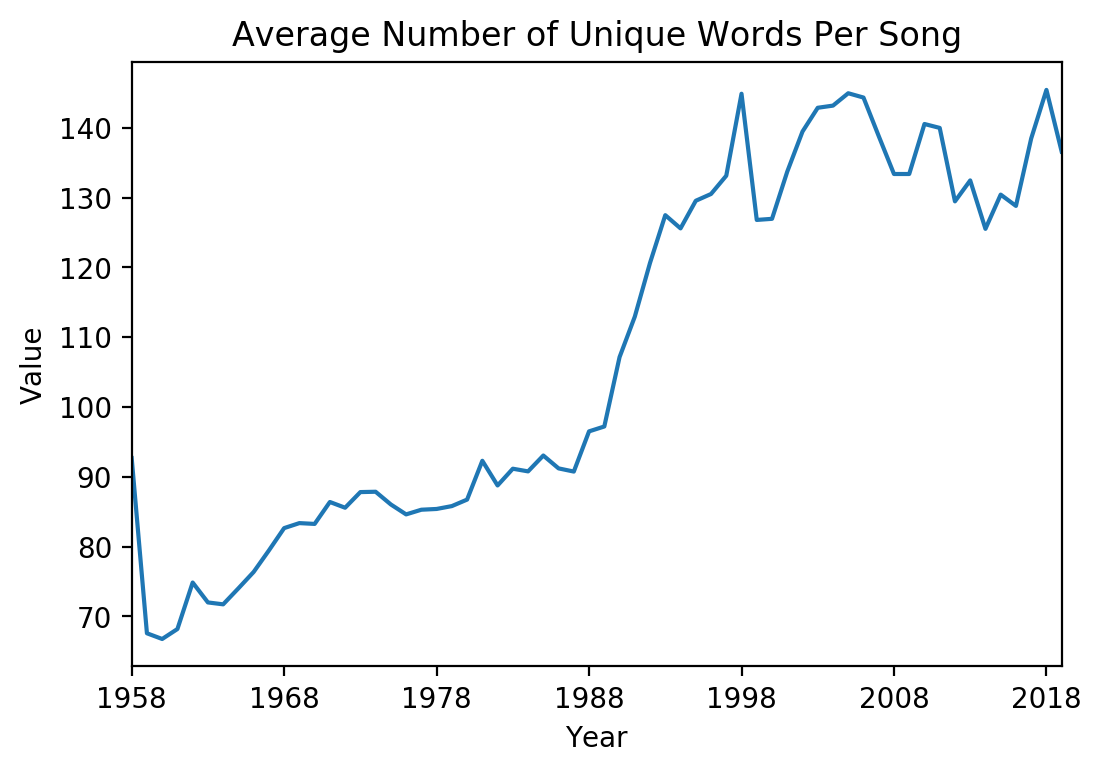

In [12]:
# Plot the average # of unique words per song
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

ax = unique.T.plot()

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Number of Unique Words Per Song')

ax.get_legend().remove()

plt.savefig('Figs/Unique.png')

plt.show()

### Track Top Words Per Decade

In [13]:
# Get STOPWORDS without punctuation for omitting in analysis
omit_words = list(STOPWORDS)
omit_words = [''.join(c for c in s if c not in string.punctuation) for s in omit_words]

# Get top 15 words per decade without the above words
sort = lyrics_functions.sort_word_len(num_words=15, binned=binned_decade, omit_words=omit_words)

In [14]:
# Structure of this DataFrame
sort

,1950s,1960s,1970s,1980s,1990s,2000s,2010s
1_most_repeated_words,"(love, 12840)","(love, 95067)","(love, 126816)","(love, 158234)","(love, 156180)","(know, 142581)","(know, 135687)"
2_most_repeated_words,"(oh, 8080)","(baby, 53560)","(oh, 70561)","(know, 85077)","(know, 111758)","(love, 111598)","(got, 124283)"
3_most_repeated_words,"(know, 4635)","(oh, 50055)","(baby, 64909)","(oh, 73377)","(baby, 99556)","(got, 106929)","(yeah, 120412)"
4_most_repeated_words,"(baby, 4492)","(know, 46368)","(know, 61095)","(baby, 67974)","(got, 74740)","(now, 91472)","(love, 113163)"
5_most_repeated_words,"(come, 4300)","(now, 42905)","(got, 57304)","(got, 59755)","(now, 72698)","(baby, 82351)","(oh, 111298)"
6_most_repeated_words,"(now, 3985)","(yeah, 37266)","(yeah, 46292)","(time, 54038)","(oh, 71537)","(go, 80142)","(baby, 93117)"
7_most_repeated_words,"(will, 3707)","(got, 32103)","(now, 43072)","(now, 53073)","(want, 65697)","(oh, 76691)","(now, 80083)"
8_most_repeated_words,"(got, 3511)","(come, 30636)","(come, 37788)","(one, 50352)","(yeah, 64415)","(yeah, 72810)","(go, 74610)"
9_most_repeated_words,"(one, 3443)","(go, 28020)","(time, 36363)","(want, 47564)","(one, 58532)","(see, 72396)","(aint, 64817)"
10_most_repeated_words,"(little, 3431)","(one, 27781)","(go, 32998)","(never, 45836)","(go, 57703)","(girl, 72218)","(cause, 63184)"


### Bar Charts

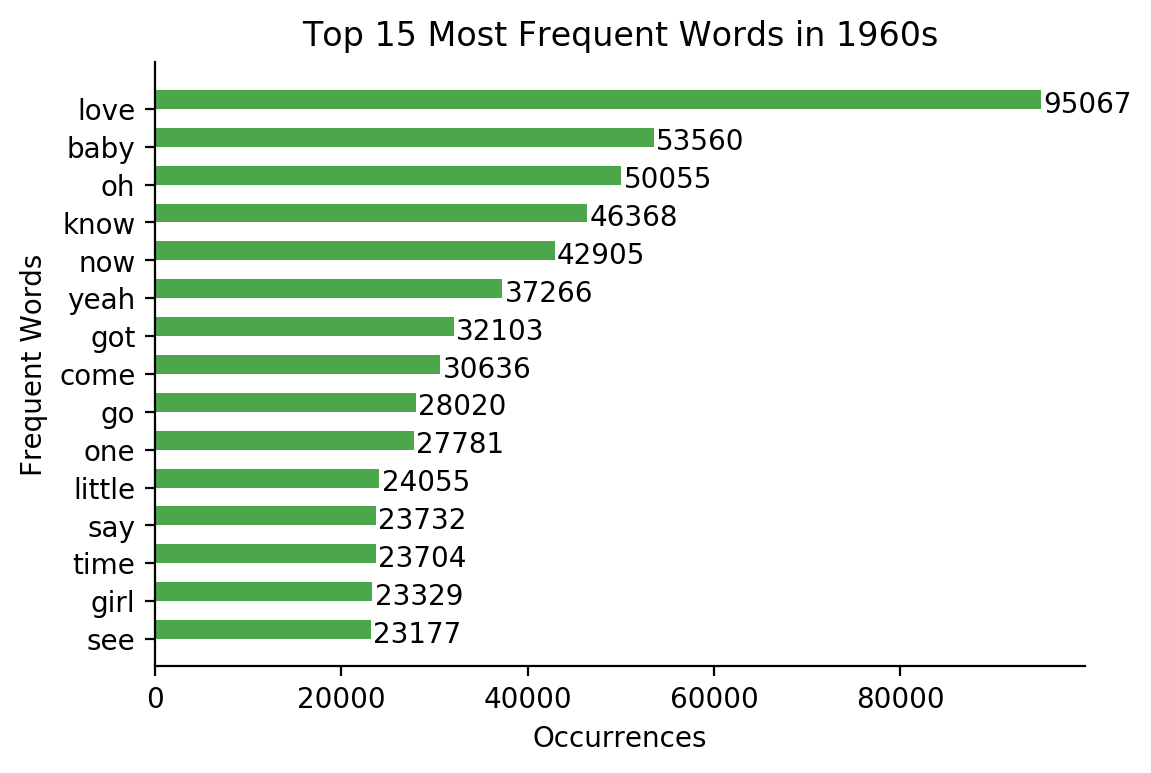

In [15]:
# Plot a bar chart for the top 15 words of the 1960s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Change decade here
decade = '1960s'

year = sort[decade]
words = []
occurences = []

for i in range(len(year)):
    words.append(year[i][0])
    occurences.append(year[i][1])

bar_width=0.5

plt.barh(y=range(len(words)), width=occurences, color='green', alpha=0.7, height=bar_width)

for y, x in enumerate(occurences):
    plt.text(x + 5000, y+bar_width, '%s' % x, ha='center', va='bottom')

plt.yticks(np.arange(len(words))+bar_width/2, words)

plt.xlabel("Occurrences")
plt.ylabel("Frequent Words")
plt.title("Top 15 Most Frequent Words in " + decade)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.invert_yaxis()
plt.savefig('Figs/' + decade + '_bar.png')

plt.show()

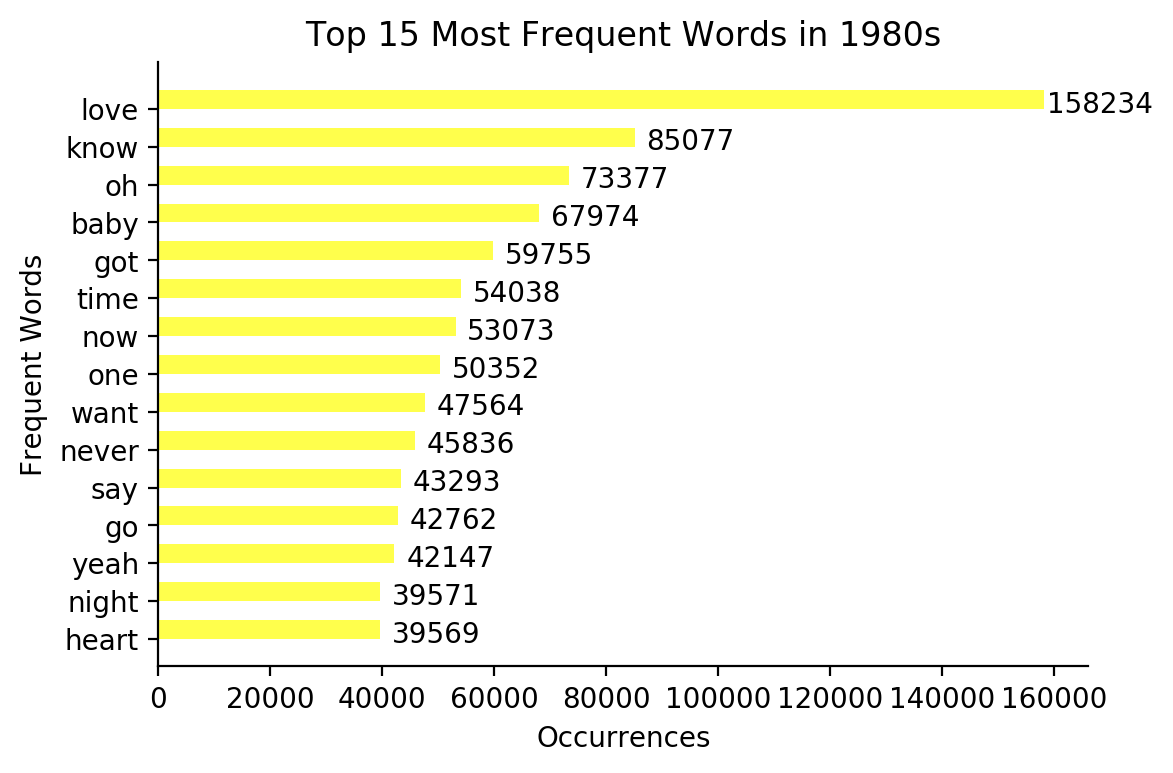

In [16]:
# Plot a bar chart for the top 15 words of the 1980s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Change decade here
decade = '1980s'

year = sort[decade]
words = []
occurences = []

for i in range(len(year)):
    words.append(year[i][0])
    occurences.append(year[i][1])

bar_width=0.5

plt.barh(y=range(len(words)), width=occurences, color='yellow', alpha=0.7, height=bar_width)

for y, x in enumerate(occurences):
    plt.text(x + 10000, y+bar_width, '%s' % x, ha='center', va='bottom')

plt.yticks(np.arange(len(words))+bar_width/2, words)

plt.xlabel("Occurrences")
plt.ylabel("Frequent Words")
plt.title("Top 15 Most Frequent Words in " + decade)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.invert_yaxis()
plt.savefig('Figs/' + decade + '_bar.png')

plt.show()

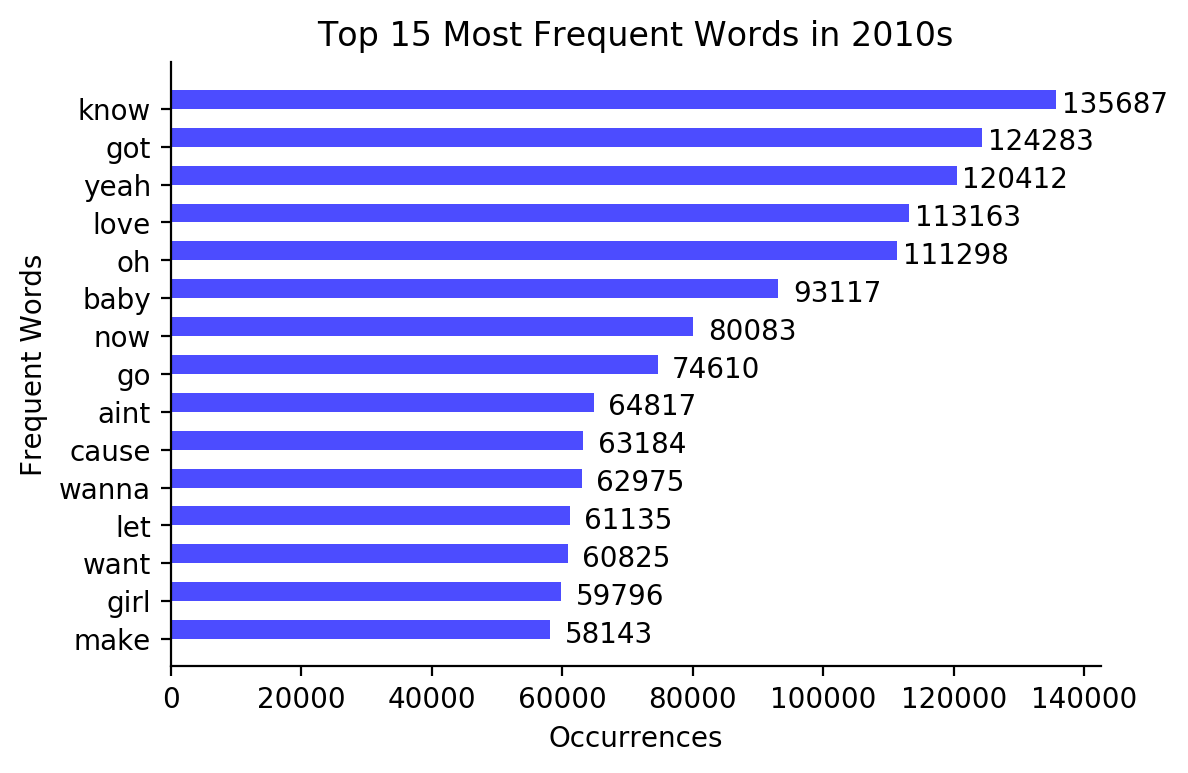

In [17]:
# Plot a bar chart for the top 15 words of the 2010s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Change decade here
decade = '2010s'

year = sort[decade]
words = []
occurences = []

for i in range(len(year)):
    words.append(year[i][0])
    occurences.append(year[i][1])

bar_width=0.5

plt.barh(y=range(len(words)), width=occurences, color='blue', alpha=0.7, height=bar_width)

for y, x in enumerate(occurences):
    plt.text(x + 9000, y+bar_width, '%s' % x, ha='center', va='bottom')

plt.yticks(np.arange(len(words))+bar_width/2, words)

plt.xlabel("Occurrences")
plt.ylabel("Frequent Words")
plt.title("Top 15 Most Frequent Words in " + decade)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.invert_yaxis()
plt.savefig('Figs/' + decade + '_bar.png')

plt.show()

### Wordclouds

In [18]:
# Censoring Information
# Words to censor
curses = ['fuck', 'shit', 'ass', 'nigga', 'bitch', 'bitches', 'niggas', 'pussy']

def censor(word):
    if len(word) < 3:
        return word
    return word[0] + '*'*len(word[1:-1]) + word[-1]

# Stopwords
stopwords = set(omit_words)

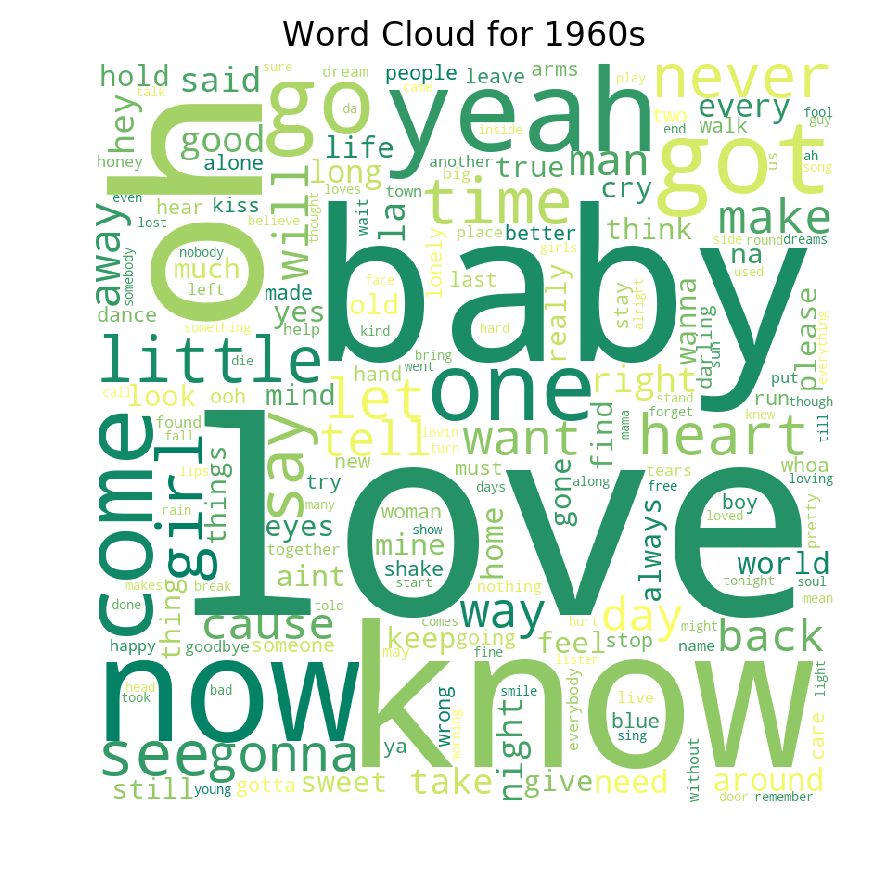

In [34]:
# Censor words, then remove stopwords (1960s)
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Change decade here
decade = '1960s'

comment_words = binned_decade[str(decade)]['words']

# Censor and remove stopwords
comment_words = [censor(word) if word in curses else word for word in comment_words]
comment_words = [word for word in comment_words if word not in stopwords]

# Create histogram using Counter
dictionary = dict(Counter(comment_words))

# Create and plot wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap =  "summer",
                collocations = False,
                min_font_size = 10).generate_from_frequencies(dictionary) 
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for " + decade)

plt.savefig('Figs/' + decade + '_cloud.png')
  
plt.show() 

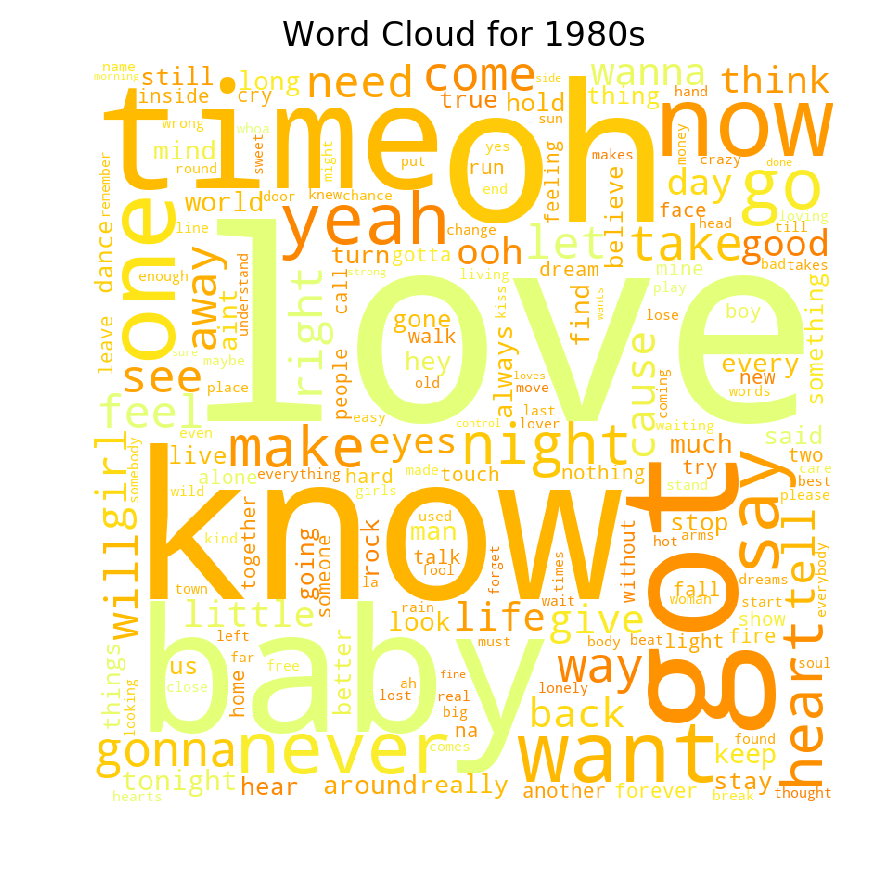

In [35]:
# Censor words, then remove stopwords (1980s)
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Change decade here
decade = '1980s'

comment_words = binned_decade[str(decade)]['words']

#Censor and remove stopwords
comment_words = [censor(word) if word in curses else word for word in comment_words]
comment_words = [word for word in comment_words if word not in stopwords]

#Create histogram using Counter
dictionary = dict(Counter(comment_words))

#Create and plot wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap =  "Wistia",
                collocations = False,
                min_font_size = 10).generate_from_frequencies(dictionary) 
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for " + decade)

plt.savefig('Figs/' + decade + '_cloud.png')
  
plt.show() 

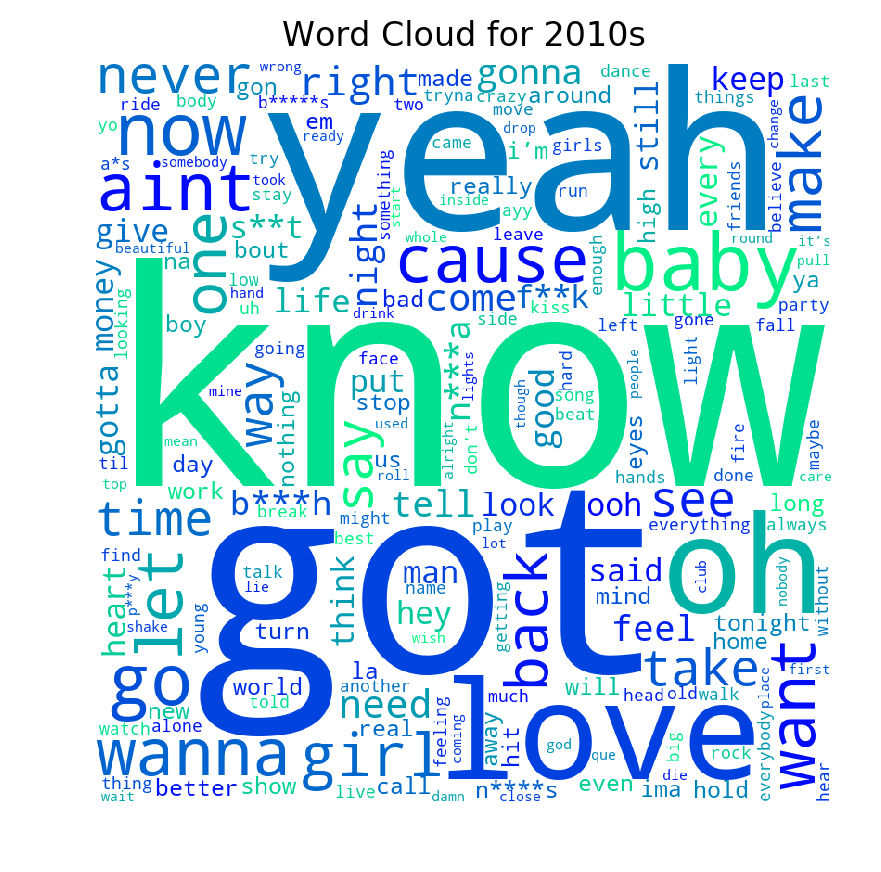

In [36]:
# Censor words, then remove stopwords (2010s)
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '2010s'

comment_words = binned_decade[str(decade)]['words']

#Censor and remove stopwords
comment_words = [censor(word) if word in curses else word for word in comment_words]
comment_words = [word for word in comment_words if word not in stopwords]

#Create histogram using Counter
dictionary = dict(Counter(comment_words))

#Create and plot wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap =  "winter",
                collocations = False,
                min_font_size = 10).generate_from_frequencies(dictionary) 
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for " + decade)

plt.savefig('Figs/' + decade + '_cloud.png')
  
plt.show() 

### Find Top Words of All Time

In [22]:
# Single structure with all words
all_words = []
years = avg.columns

for year in years:
    all_words.append(binned_year[year]['words'])
    
# Helper function to flatten list of lists
flatten = lambda l: [item for sublist in l for item in sublist]

all_words = flatten(all_words)

# Create histogram for all words
ranks = Counter(all_words)

# Delete words if they are in omit_words
for word in omit_words:
    if word in ranks:
        del ranks[word]
        
# Choose amount of top words and select them
amount = 7

top_words = ranks.most_common(amount)
top_words = [x[0] for x in top_words]

In [23]:
# Chosen top words
top_words

['love', 'know', 'baby', 'oh', 'got', 'now', 'yeah']

In [24]:
# Track only the top words
top_over_time = lyrics_functions.sort_word_len(binned = binned_decade, track_words = top_words)
top_over_time

,1950s,1960s,1970s,1980s,1990s,2000s,2010s
tracked_words: love,12840,95067,126816,158234,156180,111598,113163
tracked_words: know,4635,46368,61095,85077,111758,142581,135687
tracked_words: baby,4492,53560,64909,67974,99556,82351,93117
tracked_words: oh,8080,50055,70561,73377,71537,76691,111298
tracked_words: got,3511,32103,57304,59755,74740,106929,124283
tracked_words: now,3985,42905,43072,53073,72698,91472,80083
tracked_words: yeah,2277,37266,46292,42147,64415,72810,120412


In [25]:
# Change index so we can divide with broadcasting
top_over_time.index = [0]*amount

# of songs gathered per decade
num_songs_decade = pd.DataFrame(columns = binned_decade.keys())

count = []
for tf in num_songs_decade.columns:
    count.append(binned_decade[str(tf)]['num_songs'])
    
num_songs_decade.loc['Num_songs'] = count

num_songs_decade.index = [0]

#Normalize
norm = top_over_time/num_songs_decade
norm.index = top_words

In [26]:
# Structure of the DataFrame
norm

,1950s,1960s,1970s,1980s,1990s,2000s,2010s
love,2.37426,2.31973,2.87363,3.26336,3.36486,2.22995,2.40302
know,0.857064,1.13142,1.3844,1.7546,2.4078,2.84906,2.88132
baby,0.830621,1.30692,1.47083,1.40187,2.14491,1.64554,1.97734
oh,1.49408,1.22139,1.5989,1.5133,1.54125,1.53244,2.36342
got,0.649223,0.783344,1.2985,1.23237,1.61026,2.13666,2.63915
now,0.736871,1.04692,0.976003,1.09456,1.56626,1.82779,1.70056
yeah,0.421043,0.909326,1.04897,0.869225,1.38781,1.45489,2.55695


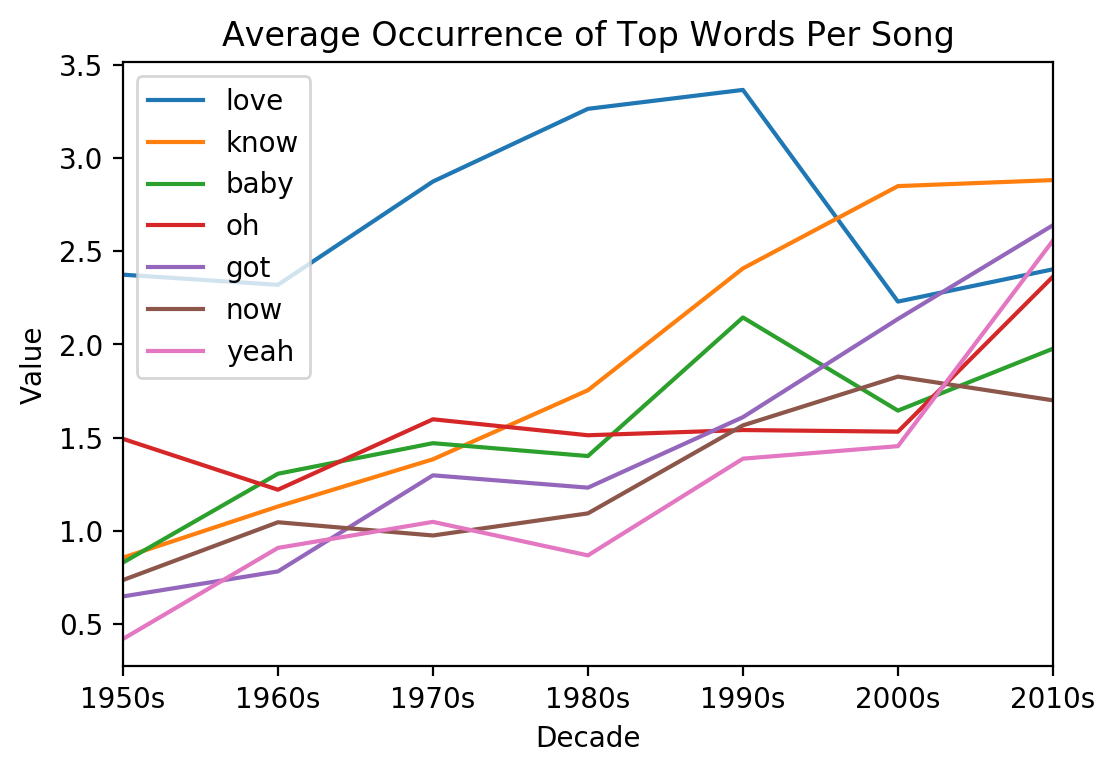

In [27]:
# Plot average occurrences of each top word over time
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

ax = norm.T.plot()

plt.xlabel('Decade')
plt.title('Average Occurrence of Top Words Per Song')
plt.ylabel('Value')

plt.legend(tuple(top_words), loc = 'best')
plt.savefig('Figs/Track.png')

plt.show()

### Balance Between Top Words Per Decade

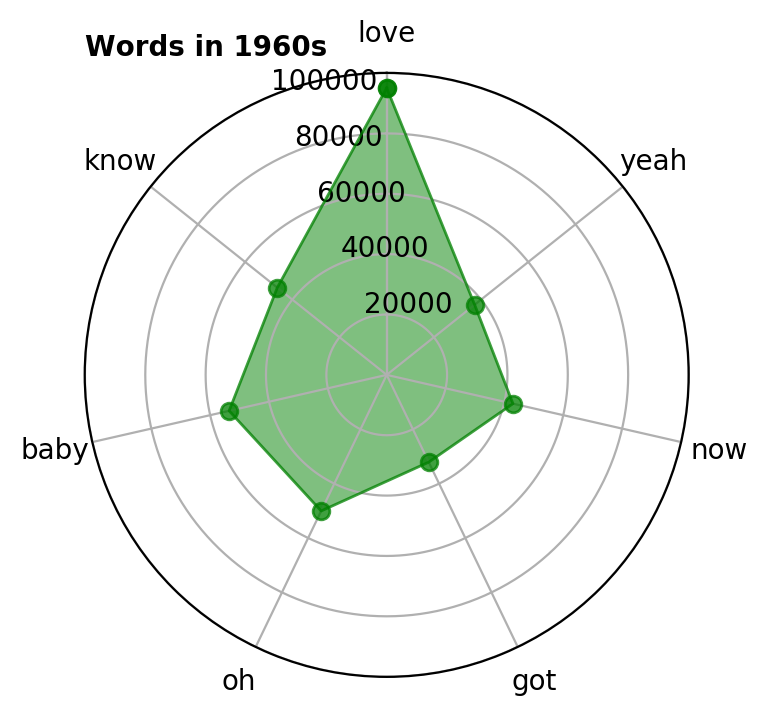

In [28]:
# Radar Chart for 1960s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '1960s'

top_over_time.index = top_words
  
theta = np.linspace(0,2*np.pi,len(top_words),endpoint=False)    
value = top_over_time[decade]   

theta = np.concatenate((theta,[theta[0]]))  
value = np.concatenate((value,[value[0]]))  

ax = plt.subplot(111,projection = 'polar')      
ax.plot(theta,value,'go-',lw=1,alpha = 0.75)   
ax.fill(theta,value,'g',alpha = 0.5)           

ax.set_thetagrids(theta*180/np.pi,top_words)         
ax.set_ylim(0,max(value) + 5000)                          
ax.set_theta_zero_location('N')         
ax.set_title('Words in '+ decade, fontsize = 10,loc = "left", fontweight='bold')   

plt.savefig('Figs/' + decade + '_radar.png')
plt.show()

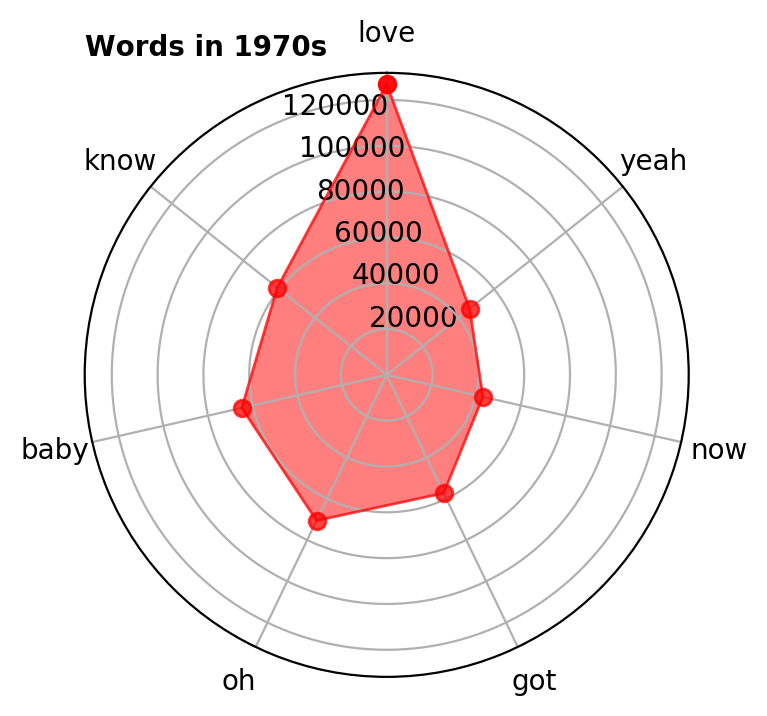

In [29]:
# Radar Chart for 1970s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '1970s'

top_over_time.index = top_words
  
theta = np.linspace(0,2*np.pi,len(top_words),endpoint=False)    
value = top_over_time[decade]   

theta = np.concatenate((theta,[theta[0]]))  
value = np.concatenate((value,[value[0]]))  

ax = plt.subplot(111,projection = 'polar')      
ax.plot(theta,value,'ro-',lw=1,alpha = 0.75)   
ax.fill(theta,value,'r',alpha = 0.5)           

ax.set_thetagrids(theta*180/np.pi,top_words)         
ax.set_ylim(0,max(value) + 5000)                          
ax.set_theta_zero_location('N')         
ax.set_title('Words in '+ decade, fontsize = 10,loc = "left", fontweight='bold')   

plt.savefig('Figs/' + decade + '_radar.png')
plt.show()

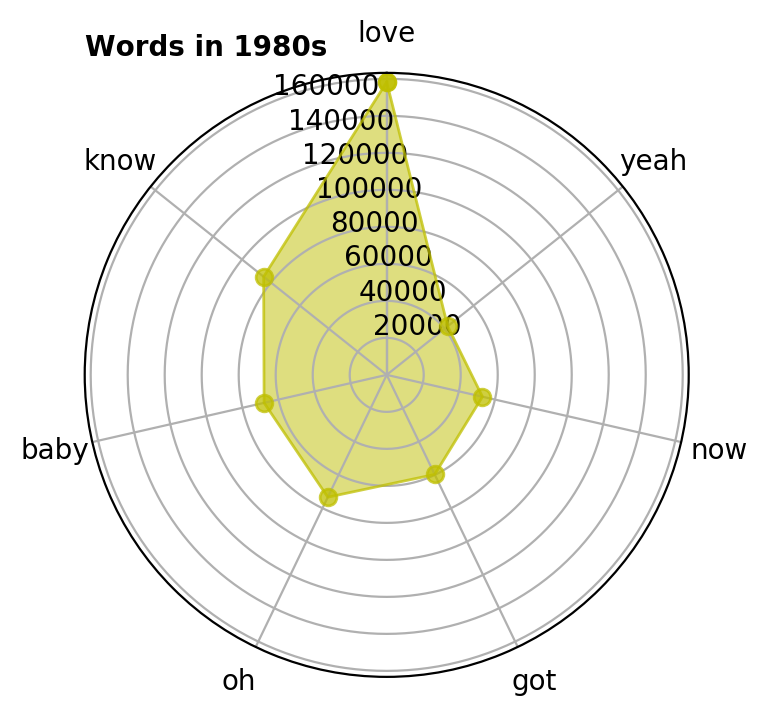

In [30]:
# Radar Chart for 1980s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '1980s'

top_over_time.index = top_words
  
theta = np.linspace(0,2*np.pi,len(top_words),endpoint=False)    
value = top_over_time[decade]   

theta = np.concatenate((theta,[theta[0]]))  
value = np.concatenate((value,[value[0]]))  

ax = plt.subplot(111,projection = 'polar')      
ax.plot(theta,value,'yo-',lw=1,alpha = 0.75)   
ax.fill(theta,value,'y',alpha = 0.5)           

ax.set_thetagrids(theta*180/np.pi,top_words)         
ax.set_ylim(0,max(value) + 5000)                          
ax.set_theta_zero_location('N')         
ax.set_title('Words in '+ decade, fontsize = 10,loc = "left", fontweight='bold')   

plt.savefig('Figs/' + decade + '_radar.png')
plt.show()

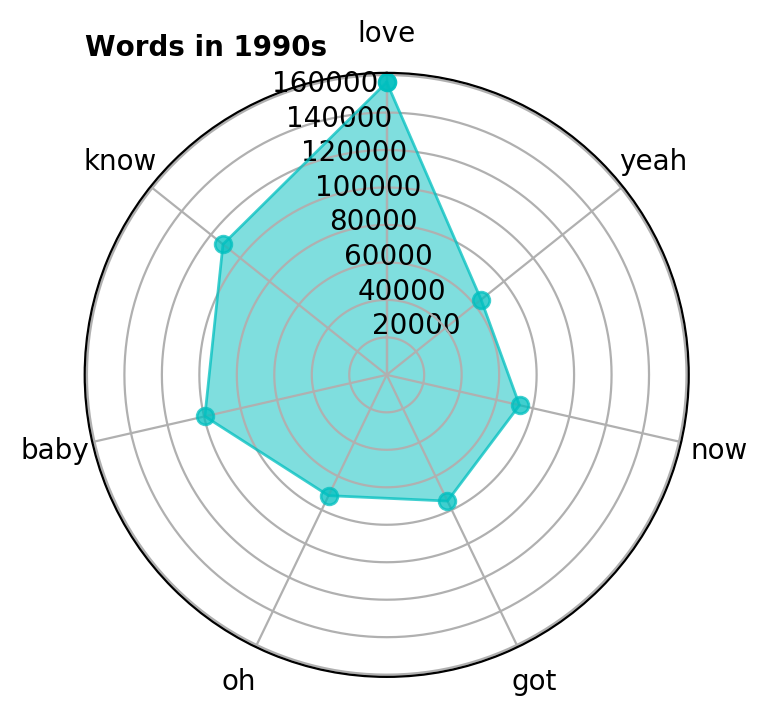

In [31]:
# Radar Chart for 1990s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '1990s'

top_over_time.index = top_words
  
theta = np.linspace(0,2*np.pi,len(top_words),endpoint=False)    
value = top_over_time[decade]   

theta = np.concatenate((theta,[theta[0]]))  
value = np.concatenate((value,[value[0]]))  

ax = plt.subplot(111,projection = 'polar')      
ax.plot(theta,value,'co-',lw=1,alpha = 0.75)   
ax.fill(theta,value,'c',alpha = 0.5)           

ax.set_thetagrids(theta*180/np.pi,top_words)         
ax.set_ylim(0,max(value) + 5000)                          
ax.set_theta_zero_location('N')         
ax.set_title('Words in '+ decade, fontsize = 10,loc = "left", fontweight='bold')   

plt.savefig('Figs/' + decade + '_radar.png')
plt.show()

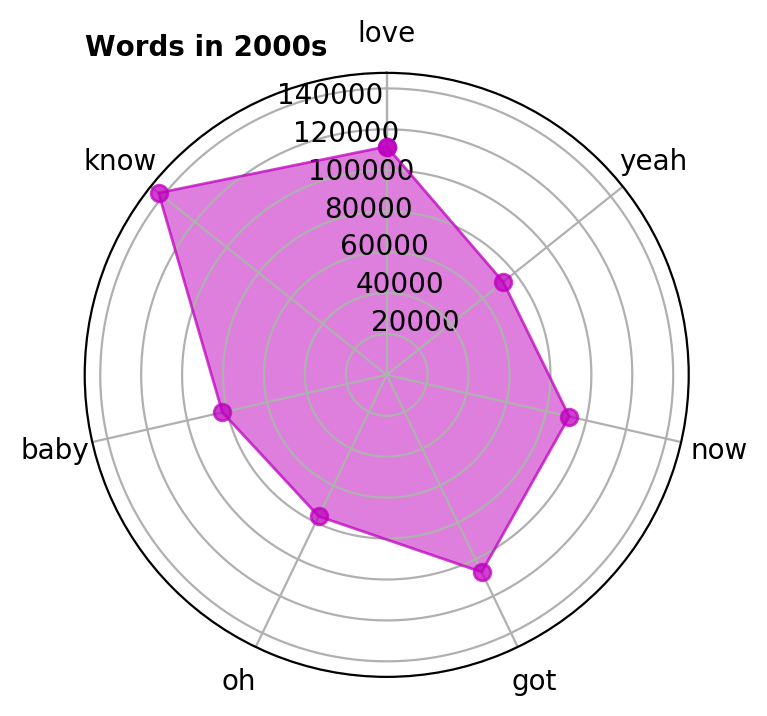

In [32]:
# Radar Chart for 2000s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '2000s'

top_over_time.index = top_words
  
theta = np.linspace(0,2*np.pi,len(top_words),endpoint=False)    
value = top_over_time[decade]   

theta = np.concatenate((theta,[theta[0]]))  
value = np.concatenate((value,[value[0]]))  

ax = plt.subplot(111,projection = 'polar')      
ax.plot(theta,value,'mo-',lw=1,alpha = 0.75)   
ax.fill(theta,value,'m',alpha = 0.5)           

ax.set_thetagrids(theta*180/np.pi,top_words)         
ax.set_ylim(0,max(value) + 5000)                          
ax.set_theta_zero_location('N')         
ax.set_title('Words in '+ decade, fontsize = 10,loc = "left", fontweight='bold')   

plt.savefig('Figs/' + decade + '_radar.png')
plt.show()

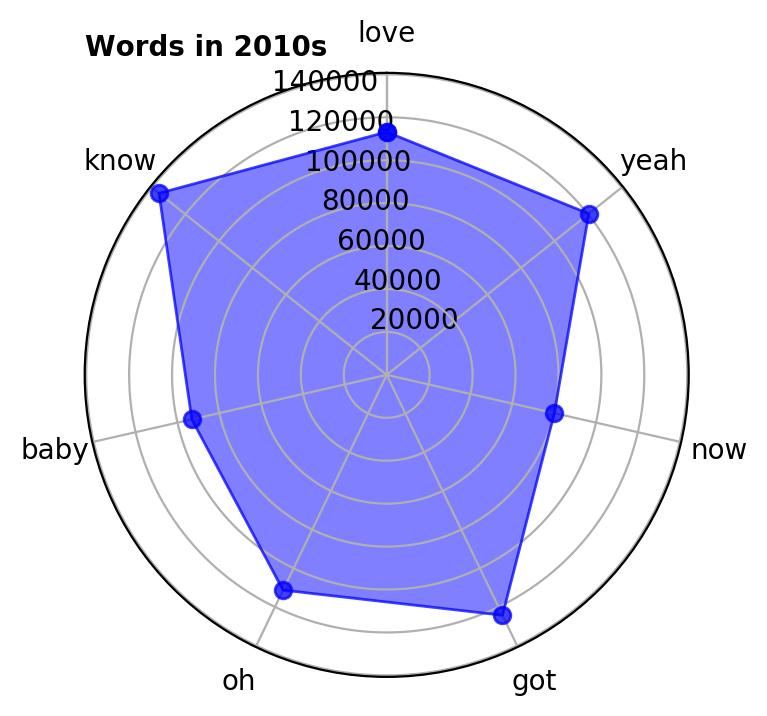

In [33]:
# Radar Chart for 2010s
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

#Change decade here
decade = '2010s'

top_over_time.index = top_words
  
theta = np.linspace(0,2*np.pi,len(top_words),endpoint=False)    
value = top_over_time[decade]   

theta = np.concatenate((theta,[theta[0]]))  
value = np.concatenate((value,[value[0]]))  

ax = plt.subplot(111,projection = 'polar')      
ax.plot(theta,value,'bo-',lw=1,alpha = 0.75)   
ax.fill(theta,value,'b',alpha = 0.5)           

ax.set_thetagrids(theta*180/np.pi,top_words)         
ax.set_ylim(0,max(value) + 5000)                          
ax.set_theta_zero_location('N')         
ax.set_title('Words in '+ decade, fontsize = 10,loc = "left", fontweight='bold')   

plt.savefig('Figs/' + decade + '_radar.png')
plt.show()